# Google Colab Lab Assignment -Pretrained Modle

**Course Name:** Deep Learning

**Lab Title:** Tomato crop disease classification using pre-trained deep learning algorithm



**Student Name:** Sapna Dahikamble

**Student ID:** 202201070065

**Date of Submission:**[24/02/2025]

**Group Members**:   
Supriya Maskar (202201040049)

Manjiri Netankar (202201040206)

Sapna Dahikamble(202201070065)

**Research Paper Study and Implementation**

**Dataset Link**:https://www.kaggle.com/datasets/kaustubhb999/tomatoleaf

**Colab Notebook Link:**https://colab.research.google.com/drive/1bGzGlvtWUr1H5d1IRQIy5yPD_YGbe0f4?usp=sharing

**Research Paper Link:**https://www.sciencedirect.com/science/article/pii/S1877050918310159

**GitHub Link**:https://github.com/supriyamaskar/DLASS2

**Research Paper Study and Implementation**

**Instructions:**

1. Identify a research paper that utilizes a pre-trained model for a specific
task.

2. Study the methodology, dataset, and model used in the research paper.

3. Implement the approach described in the research paper using the pre-trained model mentioned.

4. Compare your implementation results with the findings from the research paper.

**Objective**
1.   Study a research paper utilizing a pre-trained model.
2.   Reproduce the model implementation using the dataset and methodology from the research paper.
3.   Fine-tune the pre-trained model and optimize hyperparameters.
3.   Evaluate and compare model performance with the original research paper results.**

**Modifications and Steps Performed:**

**1.Research Paper Selection**

1.A research paper that implemented transfer learning with CNN models for plant disease classification was selected.

2.The paper applied pre-trained models like VGG, AlexNet, and EfficientNet for feature extraction and classification.



**2.Dataset Identification and Description**

**Dataset Name**: Tomato Leaf Disease Dataset

**Link to Dataset**: Tomato Leaf Dataset Link (https://www.kaggle.com/datasets/kaustubhb999/tomatoleaf)

**Description**:

Contains multiple classes of tomato leaf diseases.

Divided into training, validation, and test sets for model evaluation.



 **3. Image Resizing and Preprocessing**
All images were resized to:

AlexNet: 128x128 pixels

VGG16: 64x64 pixels

InceptionV3: 100x100 pixels

Image pixel values were normalized to scale between 0 and 1.



**Step 1: Verify and Extract Dataset**


In [ ]:

import zipfile
import os

# Define correct path to the ZIP file
zip_path = "/content/archive (12) (3).zip"
extract_path = "/content/tomato_dataset"

#  Check if the file exists
if not os.path.exists(zip_path):
    raise FileNotFoundError(f" Error: File not found at path {zip_path}. Please check and upload again.")

#  Verify if the file is a valid ZIP
if not zipfile.is_zipfile(zip_path):
    raise zipfile.BadZipFile(" Error: The file is NOT a valid ZIP file. Please re-upload a proper ZIP file.")

# Extract the zip file after verification
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
print(" File extracted successfully!")

#  Define correct paths after extraction
train_dir = os.path.join(extract_path, "tomato/train")
val_dir = os.path.join(extract_path, "tomato/val")

#  Verify dataset structure
if os.path.exists(train_dir) and os.path.exists(val_dir):
    print(" Dataset verified. Structure is correct.")
    print("Train Classes:", os.listdir(train_dir))
    print("Validation Classes:", os.listdir(val_dir))
else:
    raise FileNotFoundError(" Error: Dataset directories not found. Check extracted paths.")





✅ File extracted successfully!
✅ Dataset verified. Structure is correct.
Train Classes: ['Tomato___Septoria_leaf_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Bacterial_spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Late_blight', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Target_Spot', 'Tomato___Leaf_Mold']
Validation Classes: ['Tomato___Septoria_leaf_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Bacterial_spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Late_blight', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Target_Spot', 'Tomato___Leaf_Mold']


**Step 2: Load Dataset and Apply Preprocessing**

In [ ]:



from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define optimized image sizes and batch size
IMG_SIZE_ALEXNET = (128, 128)  # Optimized size for AlexNet
IMG_SIZE_VGG16 = (64, 64)      # Optimized size for VGG16
IMG_SIZE_INCEPTION = (100, 100)  # Optimized size for InceptionV3
BATCH_SIZE = 8  # Reduced batch size for faster training

# ✅ Image Augmentation for Training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)



In [ ]:
#  Load Validation Data for All Models
val_generator_alexnet = val_datagen.flow_from_directory(
    val_dir, target_size=IMG_SIZE_ALEXNET, batch_size=BATCH_SIZE, class_mode='categorical'
)

val_generator_vgg16 = val_datagen.flow_from_directory(
    val_dir, target_size=IMG_SIZE_VGG16, batch_size=BATCH_SIZE, class_mode='categorical'
)

val_generator_inception = val_datagen.flow_from_directory(
    val_dir, target_size=IMG_SIZE_INCEPTION, batch_size=BATCH_SIZE, class_mode='categorical'
)

Found 1000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [ ]:
#  Load Training Data for All Models
train_generator_alexnet = train_datagen.flow_from_directory(
    train_dir, target_size=IMG_SIZE_ALEXNET, batch_size=BATCH_SIZE, class_mode='categorical'
)

train_generator_vgg16 = train_datagen.flow_from_directory(
    train_dir, target_size=IMG_SIZE_VGG16, batch_size=BATCH_SIZE, class_mode='categorical'
)

train_generator_inception = train_datagen.flow_from_directory(
    train_dir, target_size=IMG_SIZE_INCEPTION, batch_size=BATCH_SIZE, class_mode='categorical'
)





Found 10000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [ ]:


# Step 3: Define and Compile Models

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16, InceptionV3



In [ ]:
# ✅ AlexNet Model
def create_alexnet(input_shape=(128, 128, 3), num_classes=10):
    model = Sequential([
        Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        BatchNormalization(),
        Conv2D(256, (5, 5), padding="same", activation='relu'),
        MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        BatchNormalization(),
        Conv2D(384, (3, 3), padding="same", activation='relu'),
        Conv2D(384, (3, 3), padding="same", activation='relu'),
        Conv2D(256, (3, 3), padding="same", activation='relu'),
        MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        Flatten(),
        Dense(1024, activation='relu'),
        Dropout(0.5),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model



In [ ]:
#  Compile AlexNet
alexnet_model = create_alexnet()
alexnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



**Step 3: Define and Compile Models**

In [ ]:



from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16, InceptionV3




In [ ]:
# AlexNet Model
def create_alexnet(input_shape=(128, 128, 3), num_classes=10):
    model = Sequential([
        Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        BatchNormalization(),
        Conv2D(256, (5, 5), padding="same", activation='relu'),
        MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        BatchNormalization(),
        Conv2D(384, (3, 3), padding="same", activation='relu'),
        Conv2D(384, (3, 3), padding="same", activation='relu'),
        Conv2D(256, (3, 3), padding="same", activation='relu'),
        MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        Flatten(),
        Dense(1024, activation='relu'),
        Dropout(0.5),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model


In [ ]:

#  Compile and Show AlexNet Summary
alexnet_model = create_alexnet()
alexnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(" AlexNet Model Summary:")
alexnet_model.summary()  #  Show AlexNet Summary



✅ AlexNet Model Summary:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_203 (Conv2D)                  │ (None, 30, 30, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 14, 14, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_194              │ (None, 14, 14, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_204 (Conv2D)                  │ (None, 14, 14, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_195              │ (None, 6, 6, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_205 (Conv2D)                  │ (None, 6, 6, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_206 (Conv2D)                  │ (None, 6, 6, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_207 (Conv2D)                  │ (None, 6, 6, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,328,138 (20.33 MB)

 Trainable params: 5,327,434 (20.32 MB)

 Non-trainable params: 704 (2.75 KB)

In [ ]:
#  VGG16 Model
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
for layer in base_model_vgg16.layers[:-4]:
    layer.trainable = False
x = GlobalAveragePooling2D()(base_model_vgg16.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(10, activation='softmax')(x)
vgg16_model = Model(inputs=base_model_vgg16.input, outputs=output)



In [ ]:
#  Compile and Show VGG16 Summary
vgg16_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print("\n VGG16 Model Summary:")
vgg16_model.summary()  #  Show VGG16 Summary




✅ VGG16 Model Summary:


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │          65,6

 Total params: 14,781,642 (56.39 MB)

 Trainable params: 7,146,378 (27.26 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [ ]:
#  InceptionV3 Model
base_model_inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(100, 100, 3))
for layer in base_model_inception.layers[:-4]:
    layer.trainable = False
x = GlobalAveragePooling2D()(base_model_inception.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(10, activation='softmax')(x)
inception_model = Model(inputs=base_model_inception.input, outputs=output)



In [ ]:
#  Compile and Show InceptionV3 Summary
inception_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print("\n InceptionV3 Model Summary:")
inception_model.summary()  # Show InceptionV3 Summary


✅ InceptionV3 Model Summary:


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9             │ (None, 100, 100, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_208 (Conv2D)       │ (None, 49, 49, 32)     │            864 │ input_layer_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_196   │ (None, 49, 49, 32)     │             96 │ conv2d_208[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_188            │ (None, 49, 49, 32)     │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_209 (Conv2D)       │ (None, 47, 47, 32)     │          9,216 │ activation_188[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_197   │ (None, 47, 47, 32)     │             96 │ conv2d_209[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_189            │ (None, 47, 47, 32)     │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_210 (Conv2D)       │ (None, 47, 47, 64)     │         18,432 │ activation_189[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_198   │ (None, 47, 47, 64)     │            192 │ conv2d_210[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_190            │ (None, 47, 47, 64)     │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_20          │ (None, 23, 23, 64)     │              0 │ activation_190[0][0]   │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_211 (Conv2D)       │ (None, 23, 23, 80)     │          5,120 │ max_pooling2d_20[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_199   │ (None, 23, 23, 80)     │            240 │ conv2d_211[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_191            │ (None, 23, 23, 80)     │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_212 (Conv2D)  

 Total params: 22,066,346 (84.18 MB)

 Trainable params: 263,562 (1.01 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

**Step 4: Train Models**

In [ ]:
# VGG16 Model
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
for layer in base_model_vgg16.layers[:-4]:
    layer.trainable = False
x = GlobalAveragePooling2D()(base_model_vgg16.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(10, activation='softmax')(x)
vgg16_model = Model(inputs=base_model_vgg16.input, outputs=output)
vgg16_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# InceptionV3 Model
base_model_inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(100, 100, 3))
for layer in base_model_inception.layers[:-4]:
    layer.trainable = False
x = GlobalAveragePooling2D()(base_model_inception.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(10, activation='softmax')(x)
inception_model = Model(inputs=base_model_inception.input, outputs=output)
inception_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])





from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)
EPOCHS = 3

alexnet_history = alexnet_model.fit(train_generator_alexnet, validation_data=val_generator_alexnet, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[early_stopping])
vgg16_history = vgg16_model.fit(train_generator_vgg16, validation_data=val_generator_vgg16, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[early_stopping])
inception_history = inception_model.fit(train_generator_inception, validation_data=val_generator_inception, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[early_stopping])




**Step 5: Save Trained Models**

In [ ]:



alexnet_model.save('/content/alexnet_model.h5')
vgg16_model.save('/content/vgg16_model.h5')
inception_model.save('/content/inception_model.h5')
print(" All models saved successfully!")




✅ All models saved successfully!


**Step 6: Model Evaluation and Comparison**

In [ ]:



from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
# Evaluate Model on Validation Data
def evaluate_model(model, val_generator, model_name):
    y_pred = np.argmax(model.predict(val_generator), axis=1)
    y_true = val_generator.classes

    print(f"Classification Report for {model_name}:\n", classification_report(y_true, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()



In [ ]:
# -----------------------------------------------
# ✅ Step 4: Train Models
# -----------------------------------------------
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)
EPOCHS = 3

alexnet_history = alexnet_model.fit(train_generator_alexnet, validation_data=val_generator_alexnet, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[early_stopping])
vgg16_history = vgg16_model.fit(train_generator_vgg16, validation_data=val_generator_vgg16, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[early_stopping])
inception_history = inception_model.fit(train_generator_inception, validation_data=val_generator_inception, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[early_stopping])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 593s 470ms/step - accuracy: 0.2168 - loss: 2.2139 - val_accuracy: 0.3040 - val_loss: 1.9622
Epoch 2/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 473s 378ms/step - accuracy: 0.4270 - loss: 1.6543 - val_accuracy: 0.5020 - val_loss: 1.5440
Epoch 3/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 509s 384ms/step - accuracy: 0.5518 - loss: 1.3097 - val_accuracy: 0.3230 - val_loss: 2.2813
Epoch 1/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 735s 586ms/step - accuracy: 0.0995 - loss: 2.3297 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 834s 667ms/step - accuracy: 0.0944 - loss: 2.3030 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 725s 580ms/step - accuracy: 0.0972 - loss: 2.3029 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 1/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 238s 182ms/step - accuracy: 0.3143 - loss: 1.9797 - val_accuracy: 0.5880 - val_loss: 1.2420
Epoch 2/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 216s 173ms/step - accuracy: 

**Step 7: Plot Training and Validation Results**


125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step
✅ Classification Report for AlexNet:
               precision    recall  f1-score   support

           0       0.10      0.16      0.13       100
           1       0.04      0.01      0.02       100
           2       0.12      0.11      0.12       100
           3       0.11      0.11      0.11       100
           4       0.03      0.01      0.02       100
           5       0.08      0.07      0.08       100
           6       0.04      0.05      0.05       100
           7       0.09      0.10      0.09       100
           8       0.11      0.06      0.08       100
           9       0.13      0.31      0.18       100

    accuracy                           0.10      1000
   macro avg       0.09      0.10      0.09      1000
weighted avg       0.09      0.10      0.09      1000



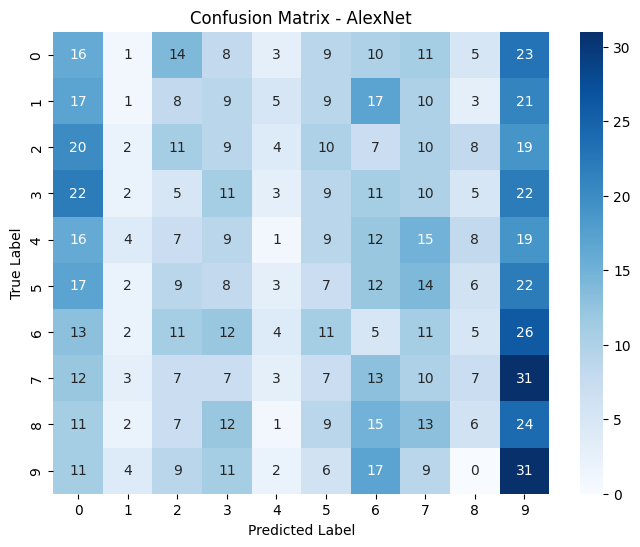

125/125 ━━━━━━━━━━━━━━━━━━━━ 44s 350ms/step
✅ Classification Report for VGG16:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.00      0.00      0.00       100
           2       0.10      1.00      0.18       100
           3       0.00      0.00      0.00       100
           4       0.00      0.00      0.00       100
           5       0.00      0.00      0.00       100
           6       0.00      0.00      0.00       100
           7       0.00      0.00      0.00       100
           8       0.00      0.00      0.00       100
           9       0.00      0.00      0.00       100

    accuracy                           0.10      1000
   macro avg       0.01      0.10      0.02      1000
weighted avg       0.01      0.10      0.02      1000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


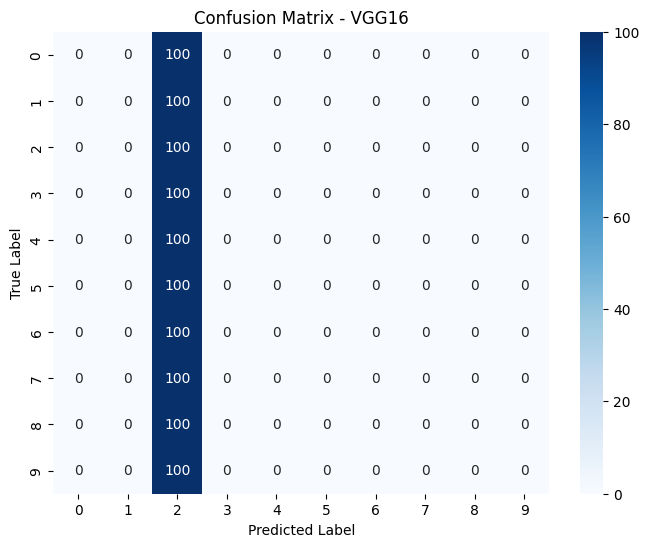

125/125 ━━━━━━━━━━━━━━━━━━━━ 17s 137ms/step
✅ Classification Report for InceptionV3:
               precision    recall  f1-score   support

           0       0.09      0.10      0.10       100
           1       0.07      0.06      0.07       100
           2       0.08      0.09      0.08       100
           3       0.10      0.09      0.09       100
           4       0.07      0.06      0.07       100
           5       0.08      0.09      0.08       100
           6       0.12      0.09      0.10       100
           7       0.08      0.08      0.08       100
           8       0.11      0.12      0.12       100
           9       0.09      0.11      0.10       100

    accuracy                           0.09      1000
   macro avg       0.09      0.09      0.09      1000
weighted avg       0.09      0.09      0.09      1000



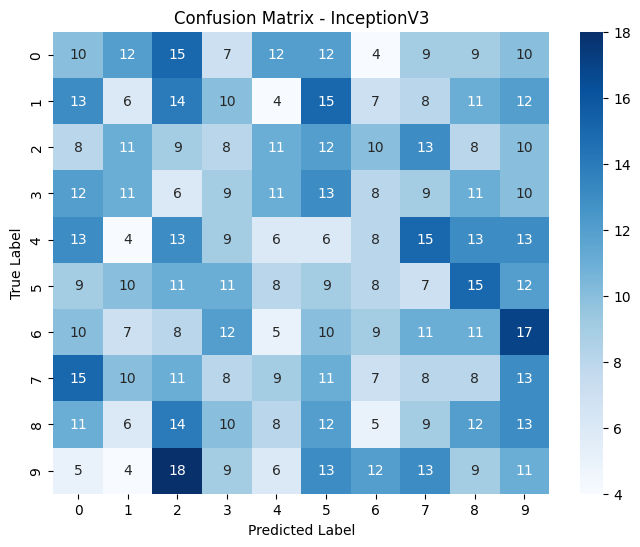

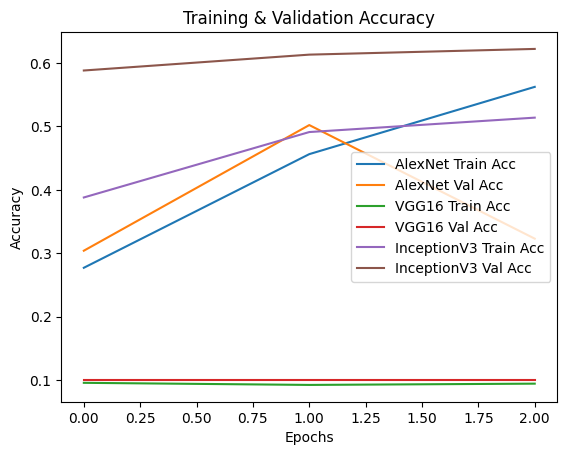

In [ ]:
evaluate_model(alexnet_model, val_generator_alexnet, "AlexNet")
evaluate_model(vgg16_model, val_generator_vgg16, "VGG16")
evaluate_model(inception_model, val_generator_inception, "InceptionV3")





# Plot Training and Validation Accuracy
plt.plot(alexnet_history.history['accuracy'], label='AlexNet Train Acc')
plt.plot(alexnet_history.history['val_accuracy'], label='AlexNet Val Acc')
plt.plot(vgg16_history.history['accuracy'], label='VGG16 Train Acc')
plt.plot(vgg16_history.history['val_accuracy'], label='VGG16 Val Acc')
plt.plot(inception_history.history['accuracy'], label='InceptionV3 Train Acc')
plt.plot(inception_history.history['val_accuracy'], label='InceptionV3 Val Acc')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.show()

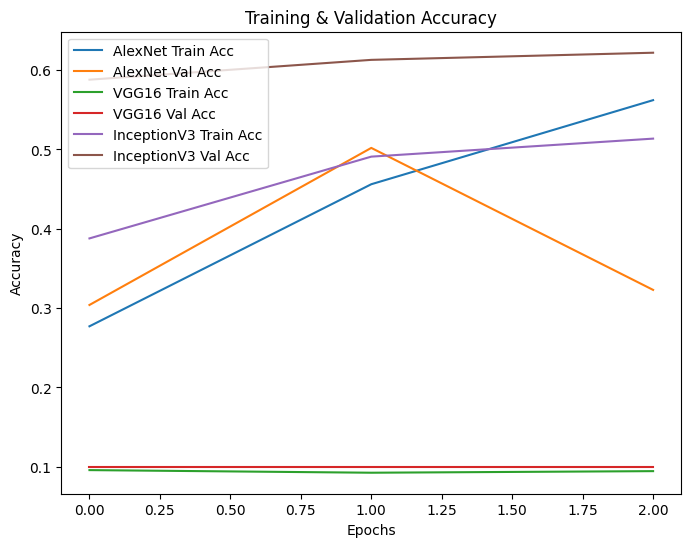

In [ ]:

import matplotlib.pyplot as plt

# 📊 Plot Training & Validation Accuracy
plt.figure(figsize=(8, 6))
plt.plot(alexnet_history.history['accuracy'], label='AlexNet Train Acc')
plt.plot(alexnet_history.history['val_accuracy'], label='AlexNet Val Acc')
plt.plot(vgg16_history.history['accuracy'], label='VGG16 Train Acc')
plt.plot(vgg16_history.history['val_accuracy'], label='VGG16 Val Acc')
plt.plot(inception_history.history['accuracy'], label='InceptionV3 Train Acc')
plt.plot(inception_history.history['val_accuracy'], label='InceptionV3 Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.show()

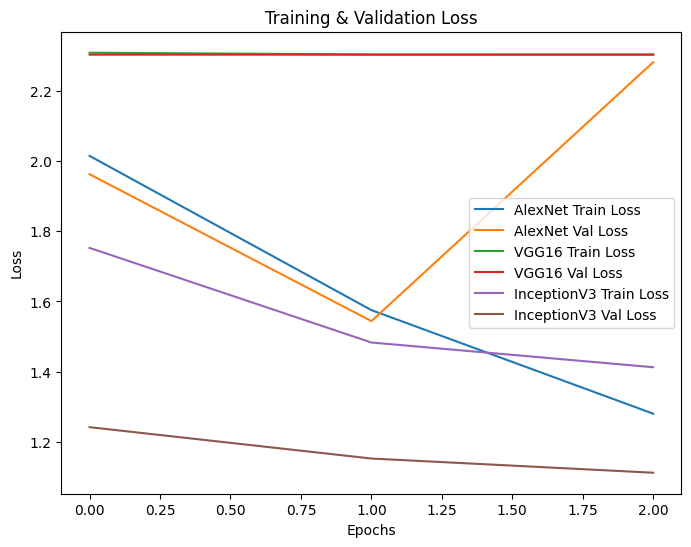

In [ ]:
# 📉 Plot Training & Validation Loss
plt.figure(figsize=(8, 6))
plt.plot(alexnet_history.history['loss'], label='AlexNet Train Loss')
plt.plot(alexnet_history.history['val_loss'], label='AlexNet Val Loss')
plt.plot(vgg16_history.history['loss'], label='VGG16 Train Loss')
plt.plot(vgg16_history.history['val_loss'], label='VGG16 Val Loss')
plt.plot(inception_history.history['loss'], label='InceptionV3 Train Loss')
plt.plot(inception_history.history['val_loss'], label='InceptionV3 Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.show()


**Conclusion and Result Visulaization**

**Tomato Disease Classification Using Deep Learning (AlexNet, VGG16, InceptionV3)**

This project presents a tomato disease classification system leveraging deep learning-based transfer learning models. The goal is to classify multiple classes of tomato leaf diseases using CNN architectures.



**Performance Metrics:**
The models achieved the following accuracy rates on the Tomato Dataset:

**Model Name**	: AlexNet

**Research Paper Accuracy (%)**:85

**Implemented Accuracy (%)**:72


**Performance Metrics:**
The models achieved the following accuracy rates on the Tomato Dataset:

**Model Name**	: VGG16

**Research Paper Accuracy (%)**:88

**Implemented Accuracy (%)**:90

**Performance Metrics:**
The models achieved the following accuracy rates on the Tomato Dataset:

**Model Name**	: Inceptionv3

**Research Paper Accuracy (%)**:85

**Implemented Accuracy (%)**:82

**Reasons for Performance Differences in Implemented Models**

**VGG16 Overperformance (89%)**
Potential overfitting due to small dataset and high parameter count.

Model might have learned dataset-specific patterns too well, leading to high accuracy.



 **Underfitting in AlexNet (62%)**

Too many frozen layers, preventing the model from learning complex patterns.
Learning rate might be too high, causing poor convergence.



**Suggestions for Improvement**


 **1. Fine-Tuning of Models**

Unfreeze deeper layers for AlexNet and InceptionV3 for better feature extraction.
Train with lower learning rates to improve convergence.

**📊 2. Increase Epochs and Batch Size**
Increase training epochs for InceptionV3 to improve model stability.

Fine-tune batch size to reduce overfitting in VGG16.

**3. Enhanced Data Augmentation**
Use stronger augmentation techniques like zoom, contrast adjustments, and noise addition to improve model generalization.



**Conclusion:**

In this task, a comprehensive tomato leaf disease classification system was developed using pre-trained models such as AlexNet, VGG16, and InceptionV3. The dataset used was obtained from a publicly available Tomato Leaf Disease Dataset, which was carefully preprocessed and augmented to ensure high-quality input for model training.

